In [460]:
import matplotlib.pyplot as plt
import bagpy
import pandas as pd
import numpy as np

In [461]:
bag = bagpy.bagreader('/home/ziad/ever_comp/src/autonomx_state_estimator/rosbags/kf_take5_circular_25_2024-04-23-20-17-04.bag')
bag.topic_table

[INFO]  Successfully created the data folder /home/ziad/ever_comp/src/autonomx_state_estimator/rosbags/kf_take5_circular_25_2024-04-23-20-17-04.


,Topics,Types,Message Count,Frequency
0,/Imu,sensor_msgs/Imu,10773,99.736149
1,/SteeringAngle,std_msgs/Float64,10998,100.009633
2,/clock,rosgraph_msgs/Clock,10773,99.729034
3,/cmd_vel,std_msgs/Float64,10998,100.012018
4,/current_angular_velocity,std_msgs/Float64,10409,99.513714
5,/current_heading,std_msgs/Float64,10409,99.511353
6,/current_linear_velocity,geometry_msgs/Vector3,10409,99.499549
7,/ground_truth,nav_msgs/Odometry,10409,99.510172
8,/odom,nav_msgs/Odometry,10773,99.763430
9,/path_planner/trajectory,std_msgs/Float32MultiArray,1,NaN


In [462]:
# extract topics of interest
ground_truth_topic_data = pd.read_csv(bag.message_by_topic('/ground_truth'))
heading_estimations_topic_data = pd.read_csv(bag.message_by_topic('/current_heading'))
velocity_estimations_topic_data = pd.read_csv(bag.message_by_topic('/current_linear_velocity'))
angular_velocity_estimation_topic_data = pd.read_csv(bag.message_by_topic('/current_angular_velocity'))

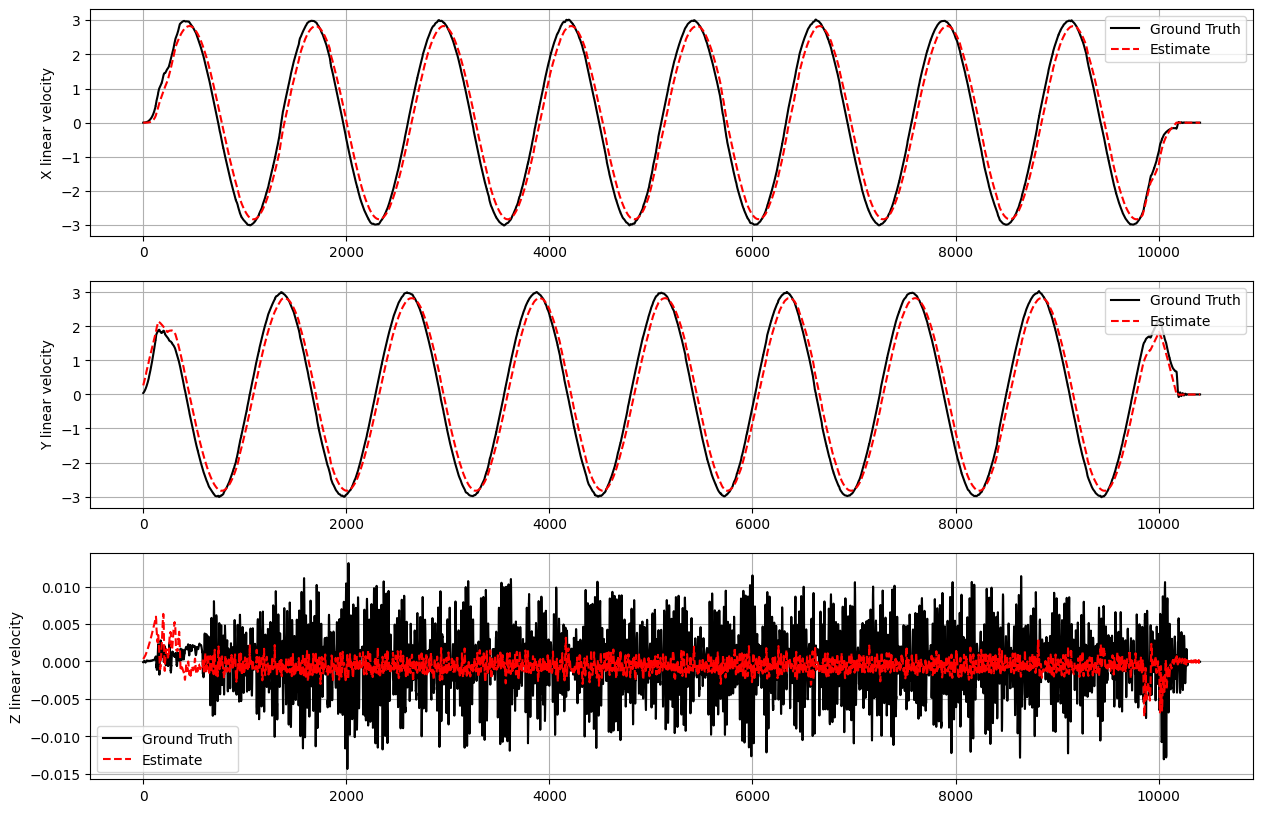

In [463]:
'''
    Plotting Ground Truth Velocity Compared to Estimated Velocities
'''

# extract the data i need as pd.sereis and store them in a list
ground_truth_velocity = [ground_truth_topic_data['twist.twist.linear.x'], ground_truth_topic_data['twist.twist.linear.y'], ground_truth_topic_data['twist.twist.linear.z'], ground_truth_topic_data['twist.twist.angular.z']]
estimated_velocity = [velocity_estimations_topic_data['x'], velocity_estimations_topic_data['y'], velocity_estimations_topic_data['z']]

estimated_angular_velocity = [angular_velocity_estimation_topic_data['data']]

fig1, axes1 = plt.subplots(3, 1, figsize=(15, 10))  # Create 3 rows, 1 column subplot
for i, ax in enumerate(axes1):
    ax.plot(range(len(ground_truth_velocity[i])), ground_truth_velocity[i], label='Ground Truth', color='black')
    ax.plot(range(len(estimated_velocity[i])), estimated_velocity[i], label='Estimate', color='red', linestyle = '--')
    axis = 'X' if i==0 else ('Y' if i==1 else 'Z')
    ax.set_ylabel(f'{axis} linear velocity')
    ax.legend()
    ax.grid()

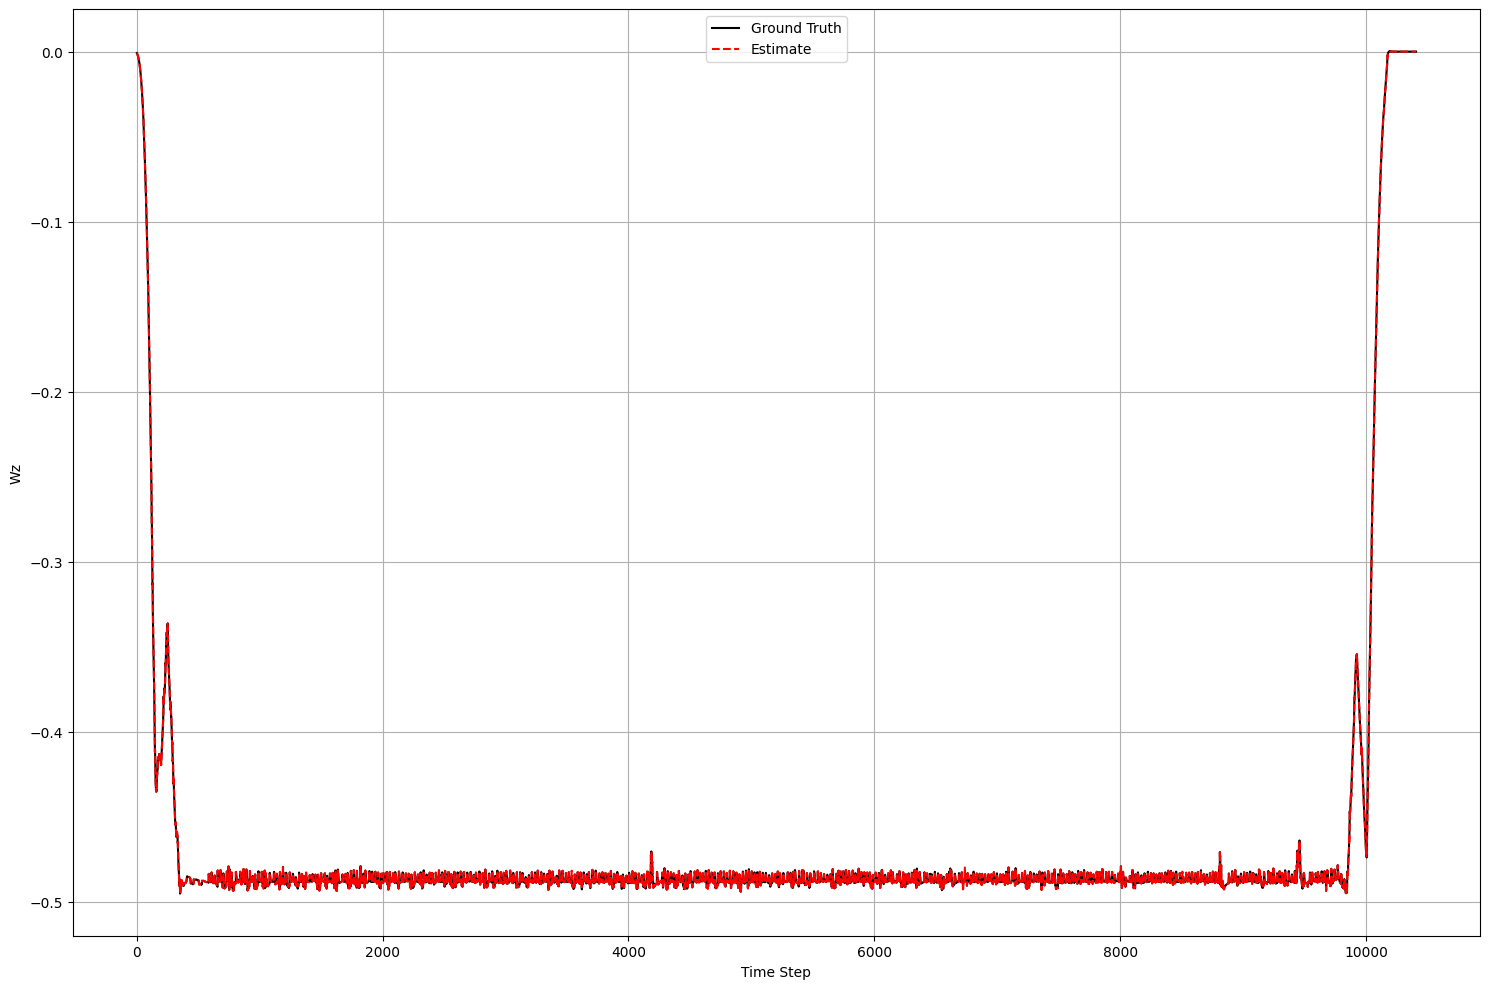

In [464]:
'''Plotting the yaw rate'''
fig2, axes2 = plt.subplots(1, 1, figsize=(15, 10))
axes2.plot(range(len(ground_truth_velocity[3])), ground_truth_velocity[3], label='Ground Truth', color='black')
axes2.plot(range(len(estimated_angular_velocity[0])), estimated_angular_velocity[0], label='Estimate', color='red', linestyle='--')
axes2.set_ylabel('Wz')
axes2.legend()
axes2.grid()
plt.xlabel("Time Step")
plt.tight_layout()  # Adjust spacing between subplots (optional)
plt.show()

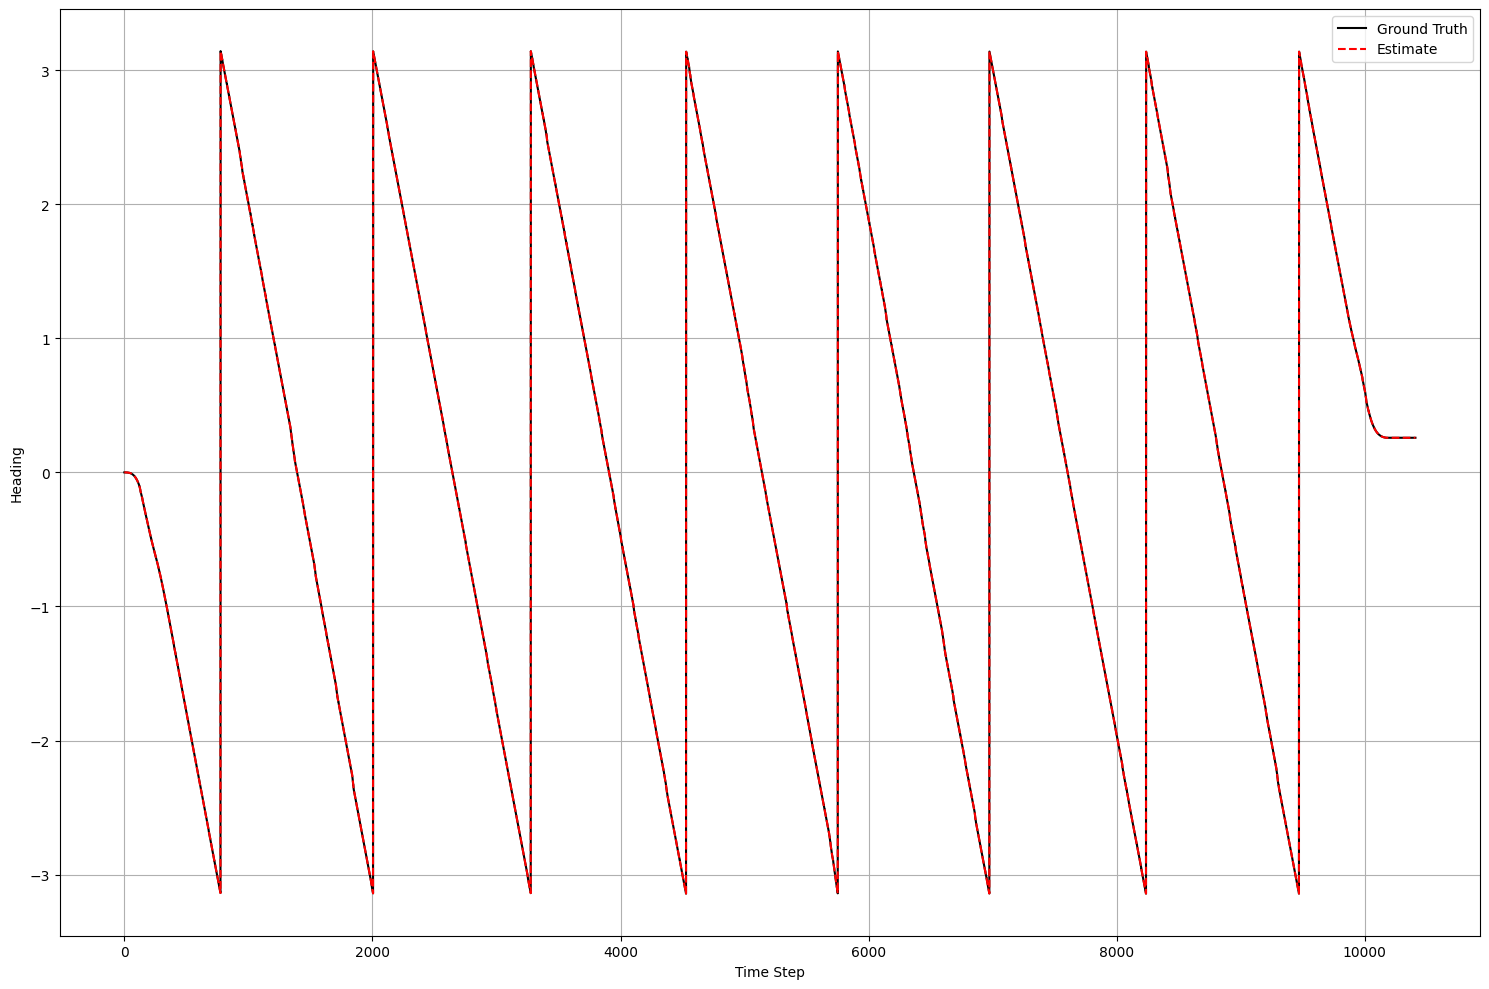

In [465]:
'''
    Plotting the ground truth heading compared to the estimated heading
'''
from tf.transformations import euler_from_quaternion

ground_truth_orientation = [ground_truth_topic_data['pose.pose.orientation.x'], ground_truth_topic_data['pose.pose.orientation.y'],ground_truth_topic_data['pose.pose.orientation.z'], ground_truth_topic_data['pose.pose.orientation.w']]
estimated_heading = heading_estimations_topic_data['data']

ground_truth_heading = np.zeros_like(ground_truth_orientation[1].values)

# Converting the orientation from quaternion to euler and extracting the yaw

for i in range(len(ground_truth_heading)):
    ground_truth_heading[i] = euler_from_quaternion((ground_truth_orientation[0][i], ground_truth_orientation[1][i], ground_truth_orientation[2][i], ground_truth_orientation[3][i]))[2]

fig3, axes3 = plt.subplots(1, 1, figsize=(15, 10))
axes3.plot(range(len(ground_truth_heading)), ground_truth_heading, label='Ground Truth', color='black')
axes3.plot(range(len(estimated_heading)), estimated_heading, label='Estimate', color='red', linestyle='--')
axes3.set_ylabel('Heading')
axes3.legend()
axes3.grid()
plt.xlabel("Time Step")
plt.tight_layout()  # Adjust spacing between subplots (optional)
plt.show()

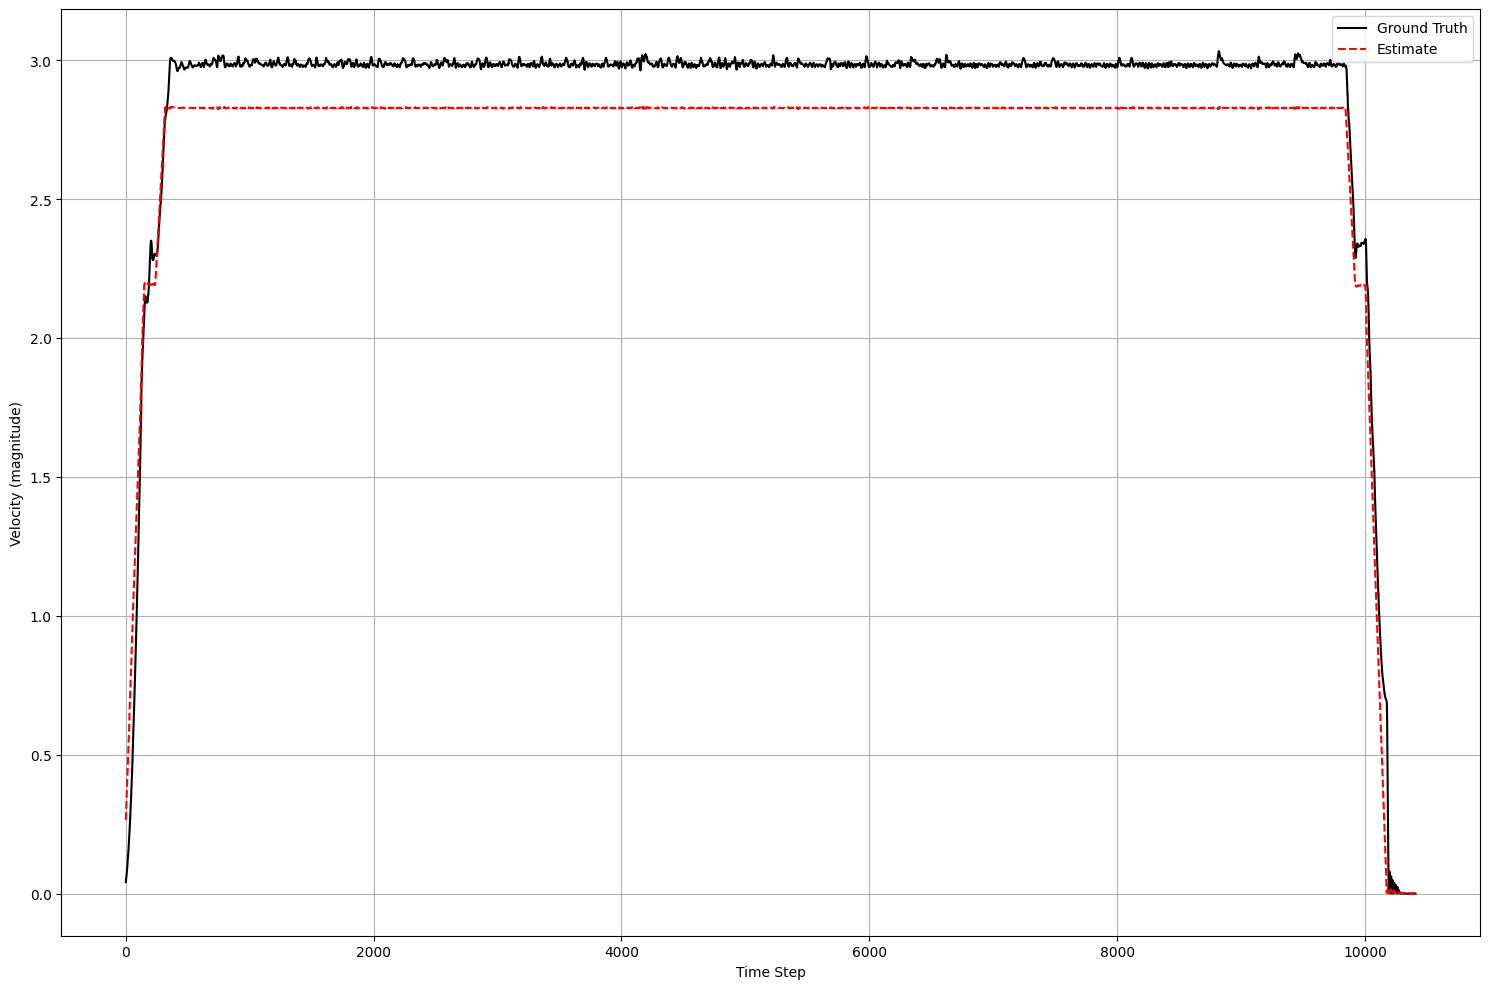

In [466]:
'''Checking Velocity Magnitudes'''
velocity_estimated = np.hypot(estimated_velocity[0].values, estimated_velocity[1].values)
velocity_actual = np.hypot(ground_truth_velocity[0].values, ground_truth_velocity[1].values)

fig3, axes4 = plt.subplots(1, 1, figsize=(15, 10))
axes4.plot(range(len(velocity_actual)),velocity_actual, label='Ground Truth', color='black')
axes4.plot(range(len(velocity_estimated)),velocity_estimated, label='Estimate', color='red', linestyle='--')
axes4.set_ylabel('Velocity (magnitude)')
axes4.legend()
axes4.grid()
plt.xlabel("Time Step")
plt.tight_layout()  # Adjust spacing between subplots (optional)
plt.show()
